In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

from src.img2vec_resnet18 import Img2VecResnet18
from tqdm import tqdm
from PIL import Image

from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Ellipse
import glob

In [2]:
CROPS_PATH = "../data/knowledge_base/crops/object/"
IMG_PATH = "../data/img/cocacola_bottle.jpeg"

# Functions

In [3]:
# Function to display images on the scatter plot
def show_images(x, y, imagenes, ax):
    for i in range(len(imagenes)):
        # Create an image box for each image using OffsetImage
        image_box = OffsetImage(imagenes[i], zoom=0.6)
        
        # Create an annotation box for each image at the corresponding coordinates
        ab = AnnotationBbox(image_box, (x[i], y[i]), frameon=False)
        
        # Add the annotation box to the plot
        ax.add_artist(ab)

# Get embeddings

In [4]:
# Create an instance of the Img2VecResnet18 model
img2vec = Img2VecResnet18()

# Create an empty dictionary to store the image feature vectors
allVectors = {}

# Print a message indicating the conversion process is starting
print("Converting images to feature vectors:")

list_imgs = glob.glob(f"{CROPS_PATH}/**/*.jpg")

# Iterate over each image file in the specified directory
for image in tqdm(list_imgs):
    # Open the image file
    I = Image.open(image)
    # Get the feature vector representation of the image using img2vec.getVec()
    vec = img2vec.getVec(I)
    # Store the feature vector in the allVectors dictionary, with the image filename as the key
    allVectors[image] = vec
    # Close the image file to free up system resources
    I.close()


# Add a new image not belonging to dataset
# Open the image 'cocacola.jpeg'
I = Image.open(IMG_PATH)
# Get the vector representation of the image using img2vec.getVec()
vec = img2vec.getVec(I)
# Store the vector representation in a dictionary
allVectors["coca_cola"] = vec
# Close the image file
I.close() 

embeddings = np.array(list(allVectors.values()))

Converting images to feature vectors:


100%|██████████| 88/88 [00:00<00:00, 106.43it/s]


# TSNE

In [5]:
# Perform t-SNE dimensionality reduction on the vector representations
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

# Get thumbnails

In [6]:
# Create an empty list to store the thumbnail images
images = []

# Iterate over all files in the directory specified by PATH
for image in tqdm(list_imgs):
    # Open each image file
    I = Image.open(image)
    
    # Resize the image to a thumbnail size of [100, 100] using Lanczos resampling
    I.thumbnail([100, 100], Image.Resampling.LANCZOS)
    
    # Append the resized image to the images list
    images.append(I)
    

# Open the image 'cocacola.jpeg'
I = Image.open(IMG_PATH)
# Resize the image to a thumbnail size of [100, 100] using Lanczos resampling
I.thumbnail([100, 100], Image.Resampling.LANCZOS)
# Append the resized image to the imagenes list
images.append(I)

100%|██████████| 88/88 [00:00<00:00, 1543.97it/s]


# Plot T-SNE

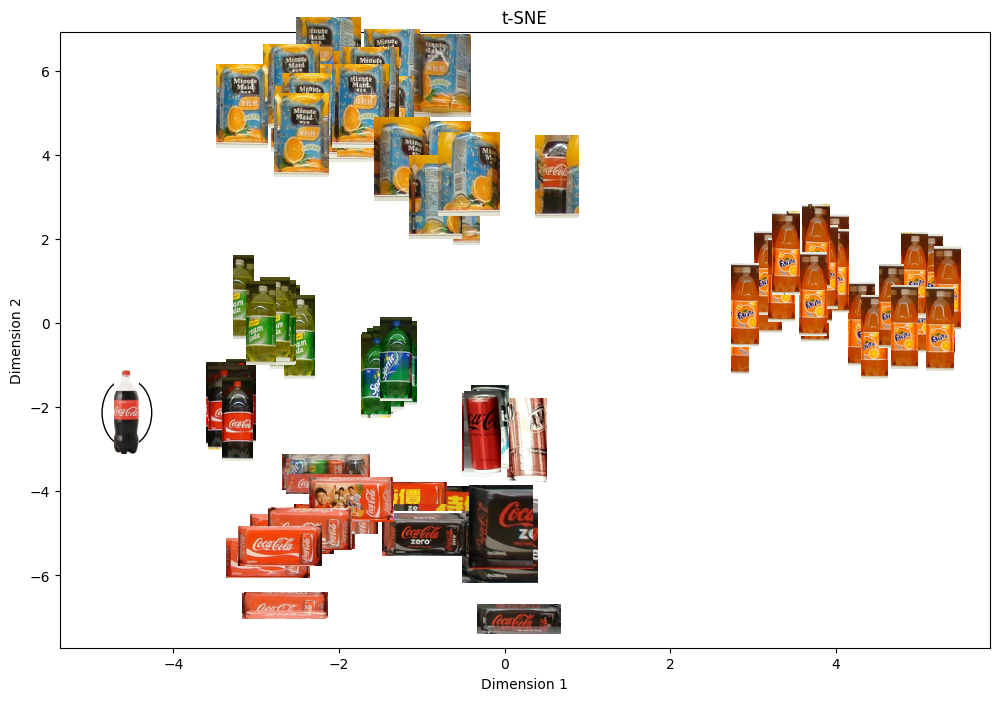

In [7]:
# Create a scatter plot to visualize the t-SNE embeddings
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1])

# Call the function to display the images on the scatter plot
show_images(embeddings_tsne[:, 0], embeddings_tsne[:, 1], images, ax)


# Highlight the new added picture
# Create an Ellipse patch with specified center, width, height, and angle
ellipse = Ellipse(xy=embeddings_tsne[-1,:], width=0.6, height=1.6, angle=0, fill=False)
# Add the Ellipse patch to the axes
ax.add_patch(ellipse)

# Set the title and labels for the plot
ax.set_title('t-SNE')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

# Display the plot
plt.show()